## 1. 변수 선택과 차원 축소

### 1.1 주성분 분석

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

from sklearn.model_selection import train_test_split
X, y = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

In [2]:
# 독립변수 데이터 표준화 작업 수행
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X_std = sc.fit_transform(train_X)
test_X_std = sc.transform(test_X)

In [3]:
# 공분산 행렬 생성
import numpy as np
cov_mat = np.cov(train_X_std.T)
cov_mat

array([[ 1.00961538, -0.03658858,  0.89282533,  0.84057159],
       [-0.03658858,  1.00961538, -0.3421826 , -0.2898399 ],
       [ 0.89282533, -0.3421826 ,  1.00961538,  0.9779029 ],
       [ 0.84057159, -0.2898399 ,  0.9779029 ,  1.00961538]])

In [4]:
# 공분산 행렬 이용하여 고유값 분해
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals

array([2.8998938 , 0.98708902, 0.13466453, 0.01681419])

In [5]:
# 고유값의 설명 분산 비율 계산
# 어떤 고유값이 가장 설명력이 높은지 비율로 표현 aka 설명 분산
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
var_exp

[0.7180689405527696,
 0.24442204363321537,
 0.033345502524849024,
 0.004163513289165863]

In [6]:
# 고유값의 설명 분산 비율 누적합
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.71806894, 0.96249098, 0.99583649, 1.        ])

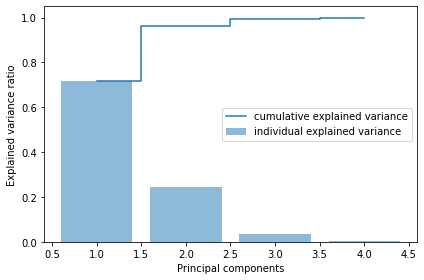

In [7]:
# 고유값 영향력 그래프 시각화
# 설명 분산 비율 이용한 막대그래프 및 누적합 이용한 계단그래프 생성
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(1, 5), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid', label='cumulative explained variance')

plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [8]:
# 주성분 및 주성분행렬 쌍을 이용한 투영행렬 생성
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(2.8998937983861857,
  array([ 0.53547007, -0.20428207,  0.58615942,  0.57267597])),
 (0.9870890223649085,
  array([-3.25785192e-01, -9.44860554e-01,  7.51890810e-04, -3.31960469e-02])),
 (0.13466452942727494,
  array([-0.73207448,  0.23052807,  0.13736953,  0.62614166])),
 (0.016814188283169836,
  array([ 0.26683847, -0.11119432, -0.79846489,  0.52809741]))]

In [9]:
# w: 변수를 2차원으로 축소시키는 투영행렬
# eigen_pairs의 0, 1번째 2개의 고유값 쌍으로만 차원축소 수행
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 5.35470073e-01 -3.25785192e-01]
 [-2.04282071e-01 -9.44860554e-01]
 [ 5.86159424e-01  7.51890810e-04]
 [ 5.72675970e-01 -3.31960469e-02]]


In [10]:
# 전처리한 독립변수 행렬, w 행렬 내적 수행
train_X_pca = train_X_std @ w

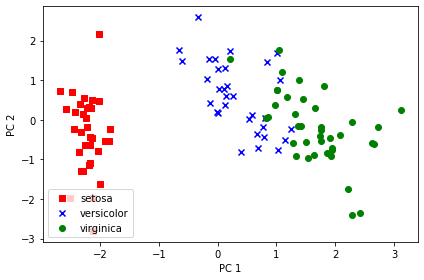

In [11]:
# 시각화
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

# np.unique(train_y) stands for setosa, versicolor, virginica

for l, c, m in zip(np.unique(train_y), colors, markers):
    plt.scatter(train_X_pca[train_y==l, 0], train_X_pca[train_y==l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [12]:
# 모델 생성
import warnings
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 30))
mlp.fit(train_X_pca, train_y)

MLPClassifier(hidden_layer_sizes=(50, 30))

In [13]:
mlp.score(train_X_pca, train_y)

0.9333333333333333

In [14]:
test_X_pca = test_X_std @ w
pred = mlp.predict(test_X_pca)
pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype='<U10')

In [15]:
import pandas as pd
confusion_matrix = pd.crosstab(test_y, pred, margins=True, rownames=['True'], colnames=['Pred'])
confusion_matrix

Pred,setosa,versicolor,virginica,All
True,,,,
setosa,16,0,0,16
versicolor,0,15,3,18
virginica,0,1,10,11
All,16,16,13,45


In [16]:
mlp.score(test_X_pca, test_y)

0.9111111111111111

In [17]:
# pca 클래스
from sklearn.decomposition import PCA
import seaborn as sns

iris = sns.load_dataset("iris")
iris_X, iris_y = iris.iloc[:,:-1], iris.species

In [18]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_X)

In [19]:
iris_pca[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [20]:
pca.explained_variance_

array([4.22824171, 0.24267075])

In [21]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

### 1.2 특이값 분해

In [25]:
x = [32,64,96,118,126,144,152,158]
y = [18,24,61.5,49,52,105,130,125]

A = np.c_[x, [1]*8]
B = np.array(y)

U, s, VT = np.linalg.svd(A, full_matrices=True)
U

array([[-0.09523708, -0.75291219, -0.30570949, -0.28090959, -0.27189145,
        -0.25160063, -0.24258249, -0.23581888],
       [-0.19045071, -0.49902645, -0.10192726,  0.12193311,  0.20333687,
         0.38649535,  0.46789912,  0.52895194],
       [-0.28566433, -0.24514071,  0.91852536, -0.0671799 , -0.06198182,
        -0.05028612, -0.04508804, -0.04118947],
       [-0.3511237 , -0.07059426, -0.09192115,  0.8886239 , -0.11845062,
        -0.13436831, -0.14144283, -0.14674873],
       [-0.37492711, -0.00712283, -0.09571988, -0.12744744,  0.86101527,
        -0.16494364, -0.17648094, -0.18513391],
       [-0.42848478,  0.1356879 , -0.10426703, -0.16360796, -0.18518648,
         0.76626184, -0.25531668, -0.27150057],
       [-0.45228818,  0.19915934, -0.10806576, -0.1796793 , -0.20572059,
        -0.26431349,  0.70964522, -0.30988575],
       [-0.47014074,  0.24676291, -0.1109148 , -0.19173281, -0.22112118,
        -0.287245  , -0.31663336,  0.66132536]])

In [26]:
s

array([336.0759044 ,   0.99321713])

In [27]:
VT

array([[-0.99996895, -0.00788011],
       [ 0.00788011, -0.99996895]])

In [28]:
S = np.zeros((1, 1))
S[0][0] = s[0]

In [31]:
A2 = U[:, 0:1] @ S @ VT[0:1, 0:1]
A2, A

(array([[ 32.00589279],
        [ 64.00390571],
        [ 96.00191863],
        [118.00055252],
        [126.00005575],
        [143.99893802],
        [151.99844125],
        [157.99806867]]),
 array([[ 32,   1],
        [ 64,   1],
        [ 96,   1],
        [118,   1],
        [126,   1],
        [144,   1],
        [152,   1],
        [158,   1]]))

In [32]:
weight, bias = np.linalg.inv(A.T @ A) @ A.T @ B
weight, bias

(0.8744839346616398, -26.72383773110744)

In [38]:
x2 = np.c_[A2, [1]*8]
weight2, bias2 = np.linalg.inv(x2.T @ x2) @ x2.T @ B
weight2, bias2

(0.8745382401681373, -26.730728978672136)

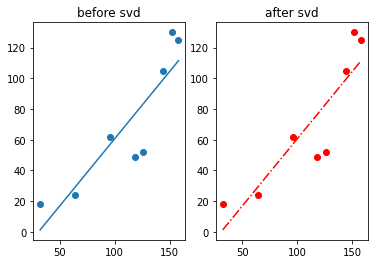

In [42]:
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(x, y)
ax[0].plot(A[:, 0], weight*A[:, 0] + bias, '-')
ax[0].set_title('before svd')

ax[1].scatter(A2[:, 0], y, color='red')
ax[1].plot(A2[:, 0], weight2*A2[:, 0] + bias2, '-.', c='red')
ax[1].set_title('after svd')

plt.show()

In [44]:
# 특이값 분해의 계산
Uw, Uv = np.linalg.eig(A @ A.T)

In [47]:
Vw, Vv = np.linalg.eig(A.T @ A)
Vw

array([1.12947014e+05, 9.86480267e-01])

In [48]:
s = np.sqrt(Vw)
s

array([336.0759044 ,   0.99321713])

In [50]:
# iris data 특이값 분해
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

In [52]:
# 특이값 분해 시행
U, s, VT = np.linalg.svd(iris.data)
U

array([[-0.06161685,  0.12961144,  0.0021386 , ..., -0.09343429,
        -0.09573864, -0.08085465],
       [-0.05807094,  0.11101978,  0.07067239, ...,  0.03690405,
        -0.03153954,  0.01309526],
       [-0.05676305,  0.11796647,  0.00434255, ...,  0.03066199,
         0.19531473,  0.13569909],
       ...,
       [-0.0940593 , -0.0498297 , -0.04144001, ...,  0.98181631,
        -0.02194514, -0.00894446],
       [-0.09488961, -0.05610123, -0.21297821, ..., -0.02155617,
         0.94178018, -0.02971961],
       [-0.08847836, -0.0515697 , -0.09575285, ..., -0.0086052 ,
        -0.03021088,  0.9736599 ]])

In [53]:
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [54]:
VT

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

In [55]:
# 차원축소 시행
N = 3
S = np.zeros((3, 3))
for i in range(N):
    S[i][i] = s[i]

S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [83]:
iris2 = U[:, 0:3] @ S @ VT[:3, :3]
print(len(iris2))
iris_df = pd.DataFrame(data=np.c_[iris2, iris.target],
                        columns=['A', 'B', 'C', 'Species'])
iris_df.head()

150


,A,B,C,Species
0,5.099009,3.500980,1.401484,0.0
1,4.868704,3.030949,1.446898,0.0
2,4.694221,3.205715,1.308660,0.0
3,4.625181,3.075098,1.462266,0.0
4,5.019480,3.580736,1.370809,0.0


In [57]:
from sklearn.model_selection import train_test_split
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [62]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=1000)
mlp.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)

In [64]:
pred = mlp.predict(test_x)
confusion_matrix = pd.crosstab(test_y, pred, margins=True, rownames=['True'], colnames=['Pred'])
confusion_matrix

Pred,0.0,1.0,2.0,All
True,,,,
0.0,13,0,0,13
1.0,0,15,0,15
2.0,0,0,17,17
All,13,15,17,45


In [65]:
mlp.score(test_x, test_y)

1.0

In [81]:
# svd class 사용
from sklearn import datasets
from sklearn.utils.extmath import randomized_svd
import numpy as np
import pandas as pd

iris = datasets.load_iris()
U, s, VT = randomized_svd(iris['data'], n_components=3, n_iter=5, random_state=None)

In [78]:
S = np.zeros((3,3))
for i in range(3):
    S[i][i] = s[i]
S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [79]:
iris2 = U @ S @ VT[:,0:3]
columns = ['A', 'B', 'C', 'Species']

iris_df = pd.DataFrame(data=np.c_[iris2, iris['target_names'][iris['target']]], columns=columns)
iris_df.head()

,A,B,C,Species
0,5.099009419824251,3.500979593534079,1.4014843995399642,setosa
1,4.868703642816381,3.0309492455919687,1.4468980697813874,setosa
2,4.69422106671382,3.2057148384549734,1.3086598198930017,setosa
3,4.625181192541419,3.0750980950373648,1.4622655979398032,setosa
4,5.019479625287906,3.5807364255354734,1.370809483649879,setosa


### 1.3 분류모형의 변수 선택

In [84]:
import pandas as pd
redwine = pd.read_csv('dataset/winequality-red.csv', delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:, :-1]
y = redwine.iloc[:, -1]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

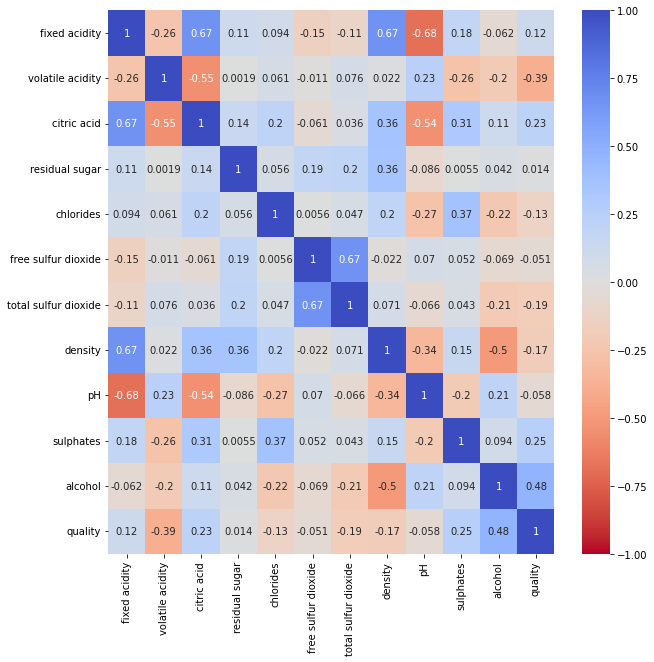

In [89]:
# check correlation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
sns.heatmap(redwine.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm_r')
plt.show()

In [90]:
# 분류모형의 feature importance
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [91]:
# 각 독립변수가 종속변수에 영향을 주는 정도 표시
rf_model.feature_importances_

array([0.07679351, 0.10421786, 0.07802557, 0.06573503, 0.07706915,
       0.06138852, 0.10841369, 0.09313385, 0.07038339, 0.10917441,
       0.15566503])

In [92]:
np.sum(rf_model.feature_importances_)

1.0000000000000002

In [94]:
# 변수별 중요도 데이터프레임 생성
features = pd.DataFrame(data=np.c_[X.columns, rf_model.feature_importances_], columns=['feature', 'importance'])
features.sort_values('importance', ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.155665
1,sulphates,0.109174
2,total sulfur dioxide,0.108414
3,volatile acidity,0.104218
4,density,0.093134
5,citric acid,0.078026
6,chlorides,0.077069
7,fixed acidity,0.076794
8,pH,0.070383
9,residual sugar,0.065735


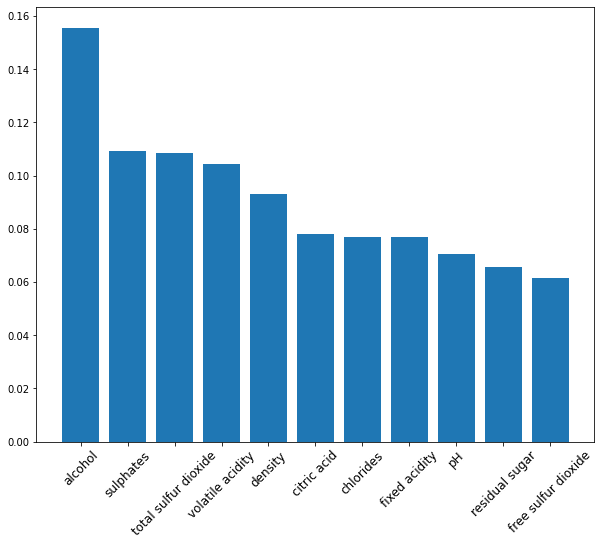

In [96]:
plt.figure(figsize=(10, 8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

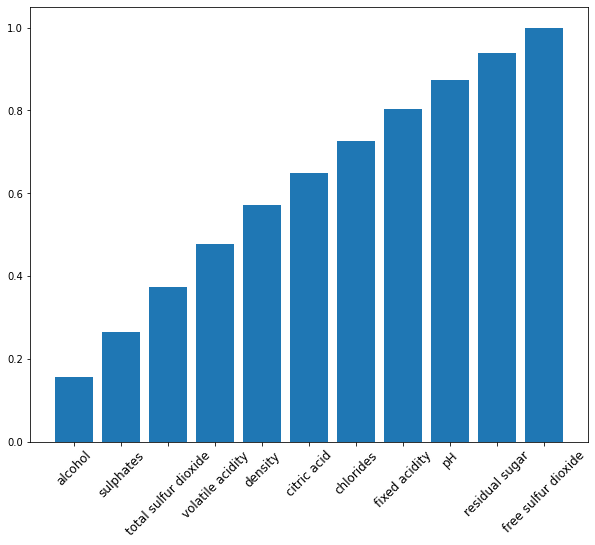

In [97]:
y_stack = np.cumsum(features.importance, axis=0)

plt.figure(figsize=(10, 8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

In [98]:
# RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model = RFE(rf_model, n_features_to_select=5)
rf_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [99]:
# rfe에 선택된 변수 여부 판단
rf_model.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
        True,  True])

In [100]:
import numpy as np
import pandas as pd

features_rfe = pd.DataFrame(data=np.c_[X.columns.values, rf_model.get_support()], columns=["feature", "selected"])
features_rfe.sort_values(by="selected", ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
8,pH,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


In [102]:
df = features.merge(features_rfe)
df[df['selected'] == True]

,feature,importance,selected
0,alcohol,0.155665,True
1,sulphates,0.109174,True
2,total sulfur dioxide,0.108414,True
3,volatile acidity,0.104218,True
8,pH,0.070383,True


### 1.4 회귀모형의 변수 선택

In [103]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [104]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [105]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X_scaled, train_y)

LinearRegression()

In [107]:
# 회귀계수를 이용한 변수별 중요도 탐색
lr.coef_

array([ -7.24560918,   6.07841138,   1.61419961,   2.43955988,
       -10.43440297,  14.59135251,   0.33601219, -16.67429358,
         7.07346015,  -5.91072872,  -9.45138418,   2.55801415,
       -20.61456368])

In [110]:
features = pd.DataFrame(np.c_[boston.feature_names, lr.coef_], columns=['feature', 'coef'])
features['coef'] = features['coef'].astype('float')
features.sort_values('coef', ascending=False, inplace=True)
features

,feature,coef
5,RM,14.591353
8,RAD,7.073460
1,ZN,6.078411
11,B,2.558014
3,CHAS,2.439560
2,INDUS,1.614200
6,AGE,0.336012
9,TAX,-5.910729
0,CRIM,-7.245609
10,PTRATIO,-9.451384


### 1.5 SelectKBest

In [111]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [112]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

### 1.6 평균값 인코딩의 과적합 해결방법

In [113]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
sex_mean = titanic.groupby("sex")["survived"].mean()
titanic['sex_mean'] = titanic['sex'].map(sex_mean)

In [115]:
# 1. smoothing
titanic['sex_n_rows'] = titanic['sex'].map(titanic.groupby('sex').size())
global_mean = titanic['survived'].mean()
alpha = 0.7

def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)

titanic['sex_mean_smoothing'] = titanic.apply(lambda x: smoothing(x['sex_n_rows'], x['sex_mean']), axis=1)

titanic[['sex_mean', 'sex_mean_smoothing']].head()

,sex_mean,sex_mean_smoothing
0,0.188908,0.189144
1,0.742038,0.741241
2,0.742038,0.741241
3,0.742038,0.741241
4,0.188908,0.189144


In [119]:
# cv loop
from sklearn.model_selection import train_test_split
import numpy as np

train, test = train_test_split(titanic, test_size=0.2, random_state=42, shuffle=True)

train_new = train.copy()
train_new[:] = np.nan
train_new['sex_mean'] = np.nan

# kfold 생성
from sklearn.model_selection import StratifiedKFold
train_X = train.drop('survived', axis=1)
train_y = train['survived']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 각 fold iteration


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_mean,sex_n_rows,sex_mean_smoothing
331,0,1,male,45.5,0,0,28.5000,S,First,man,True,C,Southampton,no,True,0.188908,577,0.189144
733,0,2,male,23.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0.188908,577,0.189144
382,0,3,male,32.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,True,0.188908,577,0.189144
704,0,3,male,26.0,1,0,7.8542,S,Third,man,True,NaN,Southampton,no,False,0.188908,577,0.189144
813,0,3,female,6.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False,0.742038,314,0.741241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,3,female,21.0,0,0,7.6500,S,Third,woman,False,NaN,Southampton,yes,True,0.742038,314,0.741241
270,0,1,male,NaN,0,0,31.0000,S,First,man,True,NaN,Southampton,no,True,0.188908,577,0.189144
860,0,3,male,41.0,2,0,14.1083,S,Third,man,True,NaN,Southampton,no,False,0.188908,577,0.189144
435,1,1,female,14.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False,0.742038,314,0.741241


## 2. 파라미터 탐색

## 3. 자료 불균형 처리

### 3.1 99% vs. 1% 샘플링

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

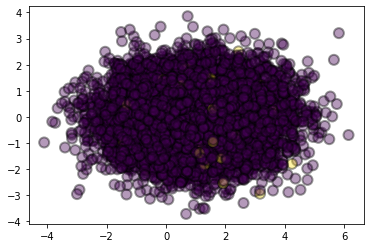

In [121]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=0, n_clusters_per_class=1, n_classes=2,
                            weights=[0.99, 0.01], random_state=42)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k', linewidth=2, alpha=0.4)
plt.show()

In [122]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [124]:
rf_pred = rf_model.predict(test_X)

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, rf_pred)

array([[2960,    0],
       [  36,    4]], dtype=int64)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(test_y, rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2960
           1       1.00      0.10      0.18        40

    accuracy                           0.99      3000
   macro avg       0.99      0.55      0.59      3000
weighted avg       0.99      0.99      0.98      3000



### 3.2 언더샘플링과 오버샘플링

### 3.3 SMOTE를 이용한 오버샘플링

In [128]:
# 1. 전체 오버샘플링 후 데이터셋 분리
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((19720, 10), (19720,))

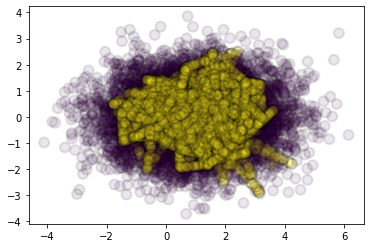

In [129]:
plt.scatter(x=X_resampled[:, 0], y=X_resampled[:, 1], marker='o', c=y_resampled, s=100, edgecolor="k", linewidth=2, alpha=0.1)
plt.show()

In [130]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=42)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((13804, 10), (5916, 10), (13804,), (5916,))

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [132]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2963,    5],
       [  29, 2919]], dtype=int64)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2968
           1       1.00      0.99      0.99      2948

    accuracy                           0.99      5916
   macro avg       0.99      0.99      0.99      5916
weighted avg       0.99      0.99      0.99      5916



In [134]:
# 2. 계층적 샘플링 후 훈련 데이터셋 오버샘플링
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=0, n_clusters_per_class=1,
                          n_classes=2, weights=[0.99, 0.01], random_state=42)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [135]:
# 훈련 데이터셋에만 오버샘플링 적용
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape

((13804, 10), (13804,))

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(resampled_X, resampled_y)

RandomForestClassifier(max_features=2, random_state=42)

In [137]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2954,    4],
       [  29,   13]], dtype=int64)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       0.76      0.31      0.44        42

    accuracy                           0.99      3000
   macro avg       0.88      0.65      0.72      3000
weighted avg       0.99      0.99      0.99      3000



### 3.4 가중치 제어

In [139]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=0, n_clusters_per_class=1, 
                          n_classes=2, weights=[0.99, 0.01], random_state=42)

In [140]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, class_weight={0:1, 1:1.4}, random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

In [142]:
rfc_pred = rf_model.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.21      0.35        42

    accuracy                           0.99      3000
   macro avg       0.99      0.61      0.67      3000
weighted avg       0.99      0.99      0.99      3000



## 4. 앙상블 모형

### 4.1 부트스트래핑과 0.632규칙

### 4.2 배깅

In [ ]:
# 클래스들의 분포가 균등할 때 좋은 성능 발휘함

### 4.3 부스팅

In [ ]:
# 특정 클래스의 분포가 크게 치우쳐져 있을 때 적합함

### 4.4 최적 모형 탐색

### 4.5 투표를 이용한 앙상블